# Linear Regresion with One Variable (Lecture: 01)

__Author__: Pablo César Rodríguez Aguayo

__Subject__: Machine Learning

__Date__: 06/02/2018

In [9]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from terminaltables import AsciiTable
from numpy.polynomial.polynomial import polyfit
sns.set(color_codes=True)

In [25]:
# Mean Square Error Function
def calculate_MSE(theta_0, theta_1, data_):
    totalError = 0
    for i in range(0, len(data_)):
        x = data_[i, 0]
        y = data_[i, 1]
        totalError += ((theta_0 + theta_1 * x) - y) ** 2
    return totalError/float(len(data_))

In [31]:
# Correct: Simultaneous update J
def correct_update(theta_0, theta_1, data_, alpha):
    temp0 = 0
    temp1 = 0
    M = float(len(data_))
    for i in range(0, int(M)):
        x = data_[i, 0]
        y = data_[i, 1]
        temp0 += (theta_0 + (theta_1 * x) - y)
        temp1 += (theta_0 + (theta_1 * x) - y) * x
    new_theta_0 = theta_0 - (alpha * temp0)/M
    new_theta_1 = theta_1 - (alpha * temp1)/M
    return [new_theta_0, new_theta_1]
    

In [32]:
# Gradient Descent Algorithm
def calculate_GDA(data_, strt_theta_0, strt_theta_1, alpha, iterations):
    theta_0 = strt_theta_0
    theta_1 = strt_theta_1
    for i in range(iterations):
        theta_0, theta_1 = correct_update(theta_0, theta_1, np.array(data_), alpha)
    return [theta_0, theta_1]

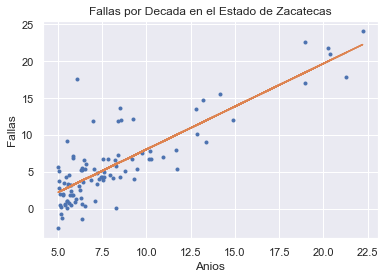

+------------+---------------+
| Parameter  | Value         |
+------------+---------------+
| Iterations | 1500          |
| Theta 0    | -3.6302914394 |
| Theta 1    | 1.16636235034 |
| Error      | 8.96677651318 |
+------------+---------------+
Predicción para el año 2050: 54.6878260774


In [43]:
# main
def main():
    np.set_printoptions(precision=300)
    data = np.genfromtxt("data.csv", delimiter=",")
    alpha = 0.01 # learning rate
    theta_0 = 0 # interception with y
    theta_1 = 0 # slope of the function
    iterations = 1500
    [theta_0, theta_1] = calculate_GDA(data, theta_0, theta_1, alpha, iterations)
    error = calculate_MSE(theta_0, theta_1, data)
    
    table_data = [
        ['Parameter', 'Value'],
        ['Iterations', '{0}'.format(iterations)],
        ['Theta 0', '{0}'.format(theta_0)],
        ['Theta 1', '{0}'.format(theta_1)],
        ['Error', '{0}'.format(error)]
    ]
    
    table = AsciiTable(table_data)
    
    
    df = pd.DataFrame(data, columns=['x', 'y'])
    Y = theta_0 + theta_1 * df.x
    
    t0, t1 = polyfit(df.x, Y, 1)
    plt.title('Fallas por Decada en el Estado de Zacatecas')
    plt.ylabel('Fallas')
    plt.xlabel('Anios')
    plt.plot(df.x, df.y, '.', label='h(x)={0} + {1}x'.format(theta_0, theta_1))
    plt.plot(df.x, t0 + t1 * df.x, '-')
    plt.show()
    print(table.table)
    
    print("Predicción para el año 2050: {0}".format(theta_0 + theta_1 * 50))
    
if __name__ == '__main__':
    if sys.path[0] == '':
        del sys.path[0]
    main()